In [64]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization

In [65]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [66]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [67]:
print('number of images', x_train.shape[0])

number of images 60000


In [68]:
print("number of labels:", len(y_train))

number of labels: 60000


In [69]:
print('size of the test arrays:', x_test.shape[0])

size of the test arrays: 10000


In [70]:
import matplotlib.pyplot as plt

In [71]:
x_train = x_train / 255.0
x_test = x_test / 255.0

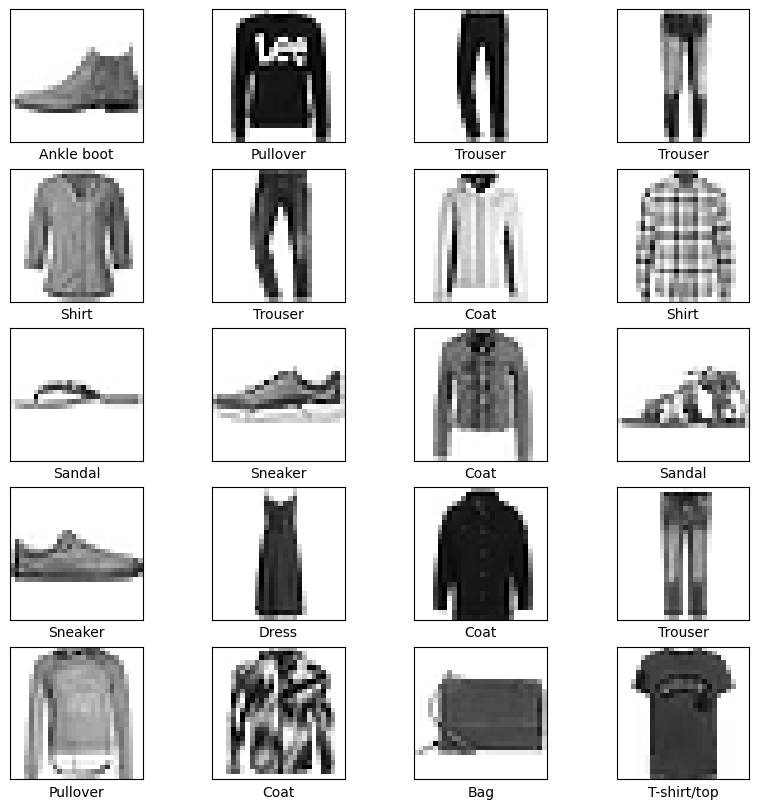

In [72]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [73]:
# Defining the model
def fashion_mnist_model_v1(epochs=10, batch_size=64):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax'),
        ])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history
history_v1 = fashion_mnist_model_v1()

Epoch 1/10
750/750 [==============================] - 1s 778us/step - loss: 0.5787 - accuracy: 0.7980 - val_loss: 0.4344 - val_accuracy: 0.8438
Epoch 2/10
750/750 [==============================] - 1s 667us/step - loss: 0.4148 - accuracy: 0.8520 - val_loss: 0.3957 - val_accuracy: 0.8564
Epoch 3/10
750/750 [==============================] - 0s 658us/step - loss: 0.3777 - accuracy: 0.8638 - val_loss: 0.3614 - val_accuracy: 0.8716
Epoch 4/10
750/750 [==============================] - 0s 654us/step - loss: 0.3512 - accuracy: 0.8733 - val_loss: 0.3406 - val_accuracy: 0.8754
Epoch 5/10
750/750 [==============================] - 0s 657us/step - loss: 0.3357 - accuracy: 0.8759 - val_loss: 0.3410 - val_accuracy: 0.8783
Epoch 6/10
750/750 [==============================] - 0s 652us/step - loss: 0.3234 - accuracy: 0.8820 - val_loss: 0.3319 - val_accuracy: 0.8798
Epoch 7/10
750/750 [==============================] - 0s 659us/step - loss: 0.3110 - accuracy: 0.8868 - val_loss: 0.3210 - val_accuracy:

In [74]:
# Improved version definition of the model with more layers and neurons
def fashion_mnist_model_v2(epochs=20, batch_size=32):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history
history_v2 = fashion_mnist_model_v2()

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5437 - accuracy: 0.8071 - val_loss: 0.4362 - val_accuracy: 0.8383
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4487 - accuracy: 0.8365 - val_loss: 0.4396 - val_accuracy: 0.8403
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4155 - accuracy: 0.8493 - val_loss: 0.4391 - val_accuracy: 0.8383
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3978 - accuracy: 0.8534 - val_loss: 0.3861 - val_accuracy: 0.8571
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3795 - accuracy: 0.8619 - val_loss: 0.3553 - val_accuracy: 0.8685
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3675 - accuracy: 0.8660 - val_loss: 0.3426 - val_accuracy: 0.8738
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3568 - accuracy: 0.8690 - val_loss: 0.3434 - val_accuracy:

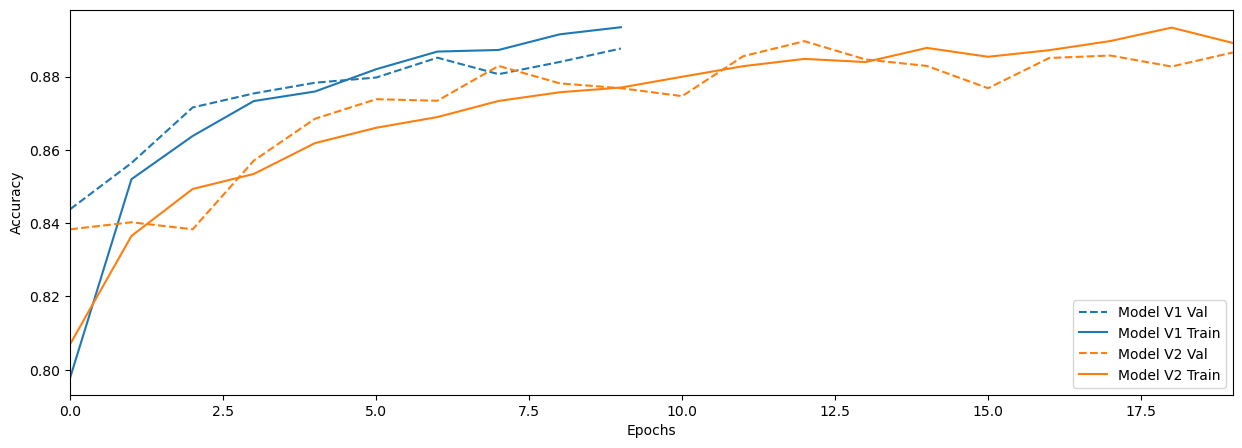

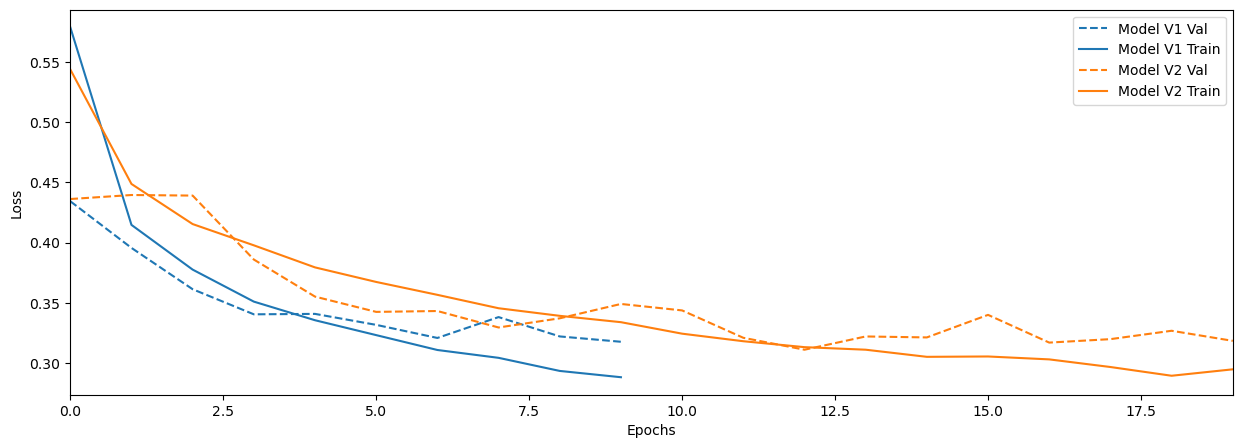

In [75]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

# Застосування функції
plot_history([('model v1', history_v1), ('model v2', history_v2)], key='accuracy')
plot_history([('model v1', history_v1), ('model v2', history_v2)], key='loss')